## Prepare input file for moment prediction


This notebook will create an input file based on coordinates and sublattice information

### Prelimary imports and settings 

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import mlene


# directory to save custom geometries
custom_dir='custom/'       # location of custom geometry files

### Import a new, unseen system

Import a geometry file and prepare a .gz input file for moment prediction

This is Step 1 in the main MLene notebook. 



#### Step 1 - Prepare input file 

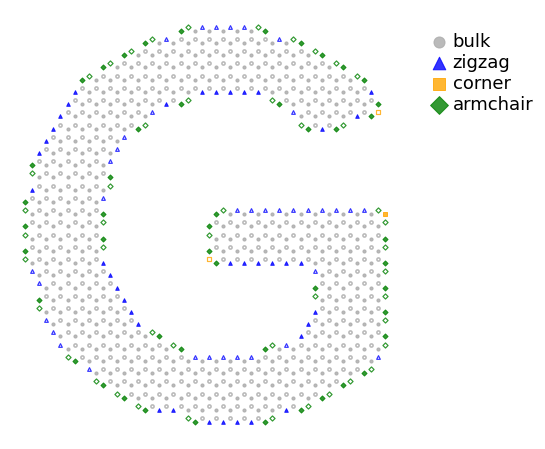

Current precision: 0.20556179723789803
Current precision: 0.0689907161028509
Current precision: 0.029302547099522736
Current precision: 0.01553544334270085
Current precision: 0.009131031844902215
Current precision: 0.005769944390915049
Current precision: 0.003820333998482417
Current precision: 0.0026024154861727933
Current precision: 0.0018025673823909294
Current precision: 0.0012605168075359163
Current precision: 0.0008862005324205557
Current precision: 0.0006248781694489502
Current precision: 0.00044130700418582025
Current precision: 0.00031190921718465825
Current precision: 0.00022052855588977627
Current precision: 0.00015593464563951054
Current precision: 0.0001102559938498393
Current precision: 7.794933664484471e-05
Current precision: 5.510086224513877e-05
Current precision: 3.894347175276147e-05
Current precision: 2.751953794266626e-05
Current precision: 1.9443779008199158e-05
Current precision: 1.3735917424817501e-05
Current precision: 9.702356072838203e-06


In [2]:
## Load file with X, Y, SUBLATTICE only, and prepare geometry for self-consistent and/or machine learning
## SKIP TO STEP 2 if you have prepared the input file already (with edge types and/or self-consistent moments)

## N.B.:
## Must supply x-coordinate, y-coordinate and sublattice index
## x AND y coords MUST be in units of the lattice constant
## sublattice indices are 1 and -1, and are used to find the sign of the moment


# import structure
# (try 'g.dat', which is included with the download)
filename = 'g.dat'
x, y, subs = np.loadtxt(filename, unpack=True, delimiter=',')


# process geometry (removes dangling atoms and classifies sites)
x1, y1, subs1, sysedges, sysdist = mlene.process_geo(x,y, subs)


# #plot edge types
fig, ax = mlene.map_site_types(x1, y1, subs1, sysedges)
plt.show()



# ## perform a self-consistent calculation of the moments (False by default as it can be slow for large systems)
perform_SC=True

if perform_SC==True:
    # #spin-independent hamiltonian
    ham = mlene.TB_Hamiltonian(sysdist, 1/np.sqrt(3), -1.0)

    # #initial guess for moments
    init = mlene.initialise_moments_smart(subs1, sysedges)

    # #self-consistent loop for moments
    final, accs, norms =mlene.find_moments(ham, init, prec=0.00001, hubU=1.33, alpha=1.0, verbose=True)
    
    
# set moments to zero if SC calculation is not performed    
if perform_SC==False:
    final = np.zeros_like(x1)

# #save the information needed to generate a descriptor for ML methods in later steps
config_name=filename+'.tidied'
np.savetxt(custom_dir+config_name+'.gz', np.c_[x1, y1, subs1, sysedges, final], delimiter=',')